<a href="https://colab.research.google.com/github/nisrinalifa/Analisis-Data-Dicoding/blob/main/Proyek_Analisis_Data_Nisrina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Input Dataset
- **Nama:** Nisrina Alifa Adzahra
- **Email:** nisrinalifa@gmail.com
- **ID Dicoding:**

## Menentukan Pertanyaan Bisnis

- Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?
- Penyewaan sepeda terbanyak pada hari apa dalam satu minggu?
- Jam dengan penyewaan tertinggi

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('https://raw.githubusercontent.com/nisrinalifa/Analisis-Data-Dicoding/refs/heads/main/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/nisrinalifa/Analisis-Data-Dicoding/refs/heads/main/Bike-sharing-dataset/hour.csv')

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


cnt: count of total rental bikes including both casual and registered

dteday : date

**Insight:**
- day.csv memiliki 16 kolom
- hour.csv memiliki 17 kolom

### Assessing Data

#### Day

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Tidak ada missing value
- secara keseluruhan data sudah baik
- Kolom dteday harus ubah tipedata ke datetime

### Cleaning Data

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- tipe data kolom 'dteday' pada day_df dan hour_df sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

In [219]:
all_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = 'left',
    left_on = 'dteday',
    right_on = 'dteday'
)

all_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
1856,82,2011-03-23,2,0,3,0,3,1,2,0.346957,...,3,1,3,0.34,0.3182,0.76,0.2239,1,1,2
11039,466,2012-04-10,2,1,4,0,2,1,1,0.446667,...,2,1,1,0.36,0.3485,0.71,0.1343,0,2,2
5539,235,2011-08-23,3,0,8,0,2,1,1,0.640833,...,2,1,1,0.72,0.6515,0.34,0.2239,133,339,472
8926,377,2012-01-12,1,1,1,0,4,1,2,0.382500,...,4,1,2,0.42,0.4242,0.71,0.1642,17,313,330
5329,226,2011-08-14,3,0,8,0,0,0,2,0.676667,...,0,0,3,0.60,0.5606,0.83,0.0000,5,22,27


### Explore Day

In [13]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [221]:
# Musim dengan penyewa tertinggi
season_max = day_df.groupby('season')['cnt'].max().sort_values(ascending = False)
print(season_max)

season
3    8714
4    8555
2    8362
1    7836
Name: cnt, dtype: int64


In [106]:
# Cuaca dengan penyewa tertinggi
weather_max = day_df.groupby('weathersit')['cnt'].max().sort_values(ascending = False)
print(weather_max)

weathersit
1    8714
2    8362
3    4639
Name: cnt, dtype: int64


In [107]:
# Rata-rata penyewaan berdasarkan hari dalam seminggu
weekday_max = day_df.groupby('weekday')['cnt'].mean().sort_values(ascending = False)
print(weekday_max)

weekday
5    4690.288462
4    4667.259615
6    4550.542857
3    4548.538462
2    4510.663462
1    4338.123810
0    4228.828571
Name: cnt, dtype: float64


In [108]:
# Rata-rata penyewaan per hari
day_max = day_df['cnt'].mean()
print(day_max)

4504.3488372093025


In [109]:
# Rata-rata penyewaan berdasarkan musim dan cuaca
sewa_season_weather = day_df.groupby(['season', 'weathersit'])['cnt'].mean().sort_values(ascending = False)
print(sewa_season_weather)

season  weathersit
3       1             5878.257353
2       1             5548.548673
3       2             5222.479167
4       1             5043.563107
        2             4654.000000
2       2             4236.705882
1       1             2811.135135
3       3             2751.750000
1       2             2357.166667
4       3             1961.600000
2       3             1169.000000
1       3              934.750000
Name: cnt, dtype: float64


### Explore Hour

In [60]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [86]:
# Jam dengan penyewaan tertinggi
rush_hour = hour_df.groupby('hr')['cnt'].max().sort_values(ascending = False)
print(rush_hour)

hr
18    977
17    976
8     839
16    783
12    776
13    760
14    750
15    750
19    743
11    663
7     596
21    584
20    567
10    539
22    502
9     426
0     283
23    256
6     213
1     168
2     132
3      79
5      66
4      28
Name: cnt, dtype: int64


In [215]:
# Rata-rata jam penyewaan tertinggi berdasarkan bulan dan cuaca
hour_month_weather = hour_df.groupby(['mnth', 'weathersit', 'hr'])['cnt'].mean().sort_values(ascending = False).reset_index()
print(hour_month_weather)

     mnth  weathersit  hr         cnt
0       7           2  17  757.333333
1       9           1  17  670.300000
2      10           1  17  653.571429
3       6           1  17  623.348837
4       8           1  17  620.755556
..    ...         ...  ..         ...
860     3           3   4    3.000000
861     2           2   4    2.500000
862     6           3   3    2.500000
863     2           1   4    2.300000
864     1           3   4    1.857143

[865 rows x 4 columns]


**Insight:**
- Rata-rata penyewaan per hari adalah 4504 unit
- Penyewaan tertinggi adalah pada Bulan September dengan cuaca cerah, pada jam 17 (jam 5 sore)
- Jam penyewaan tertinggi secara keseluruhan adalah jam 18 (jam 6 sore)
- Hari Sabtu adalah hari dengan rata-rata penyewaan terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1: Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?

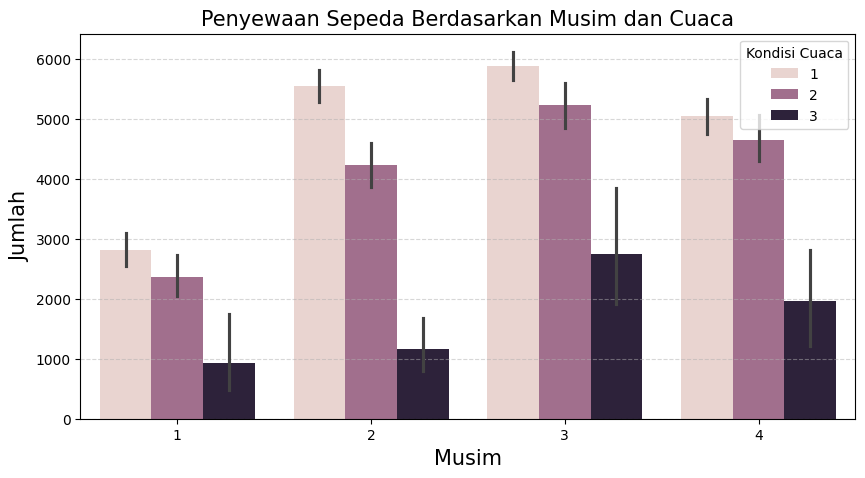

In [223]:
# Visualisasi Penyewaan sepeda terbanyak di kondisi cuaca dan musim apa?
plt.subplots(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=day_df, hue='weathersit')
plt.legend(title='Kondisi Cuaca', loc='upper right')
plt.title('Penyewaan Sepeda Berdasarkan Musim dan Cuaca', fontsize = 15)
plt.xlabel('Musim', fontsize = 15)
plt.ylabel('Jumlah', fontsize = 15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### Pertanyaan 2: Penyewaan sepeda terbanyak pada hari apa dalam satu minggu?

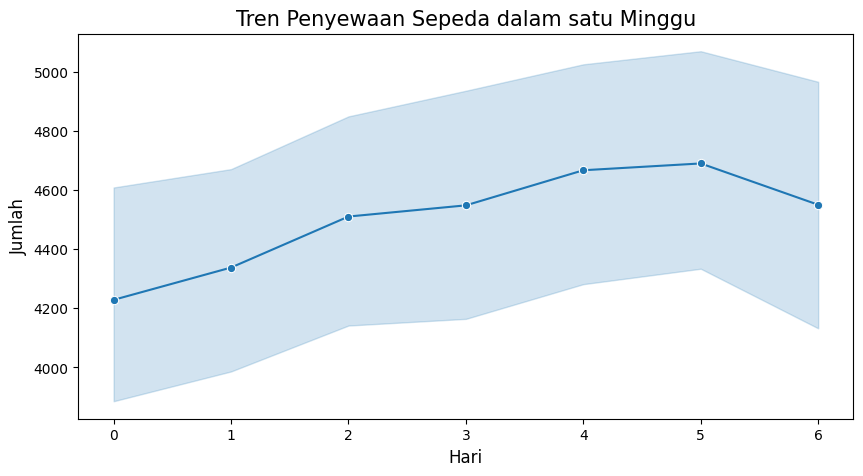

In [131]:
# Visualisasi Penyewaan sepeda terbanyak pada hari apa?
plt.figure(figsize=(10, 5))
sns.lineplot(x=day_df.weekday, y=day_df.cnt, marker = 'o')
plt.title('Tren Penyewaan Sepeda dalam satu Minggu', fontsize=15)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

### Pertanyaan 3: Jam dengan penyewaan tertinggi

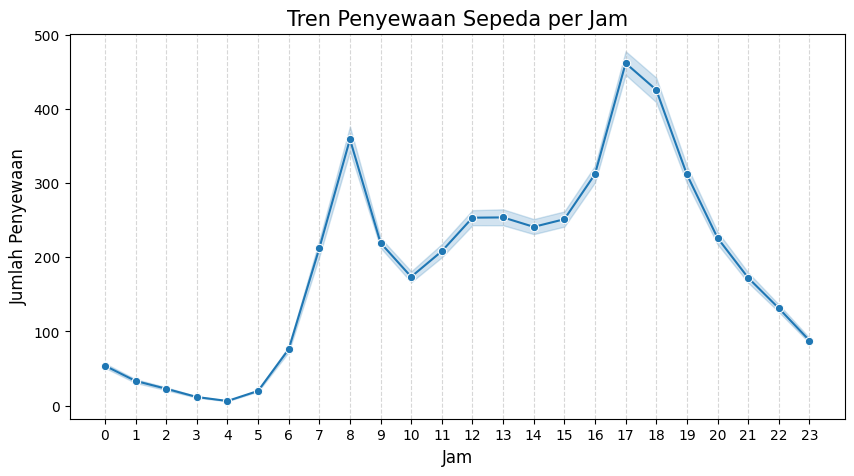

In [203]:
# Visualisasi Penyewaan sepeda terbanyak pada hari apa?
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], marker='o')
plt.title('Tren Penyewaan Sepeda per Jam', fontsize=15)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()


**Insight:**
- Musim Terbanyak penyewaan sepeda adalah musim gugur, disusul dengan musim panas, musim dingin, dan yang paling sedikit adalah musim semi
- Penyewaan sepeda terbanyak adalah hari sabtu, tren kembali menurun di hari minggu
- Penyewaan sepeda paling tinggi di jam 17, disusul oleh jam 8, kemungkinan adalah jam berangkat dan pulang kerja/sekolah

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 =
  - Musim Terbanyak penyewaan sepeda adalah musim gugur, disusul dengan musim panas, musim dingin, dan yang paling sedikit adalah musim semi
- Conclution pertanyaan 2 =
  - Penyewaan sepeda terbanyak adalah hari sabtu, tren kembali menurun di hari minggu
- Conclusion pertanyaan 3 =
  - Penyewaan sepeda paling tinggi di jam 17, disusul oleh jam 8, kemungkinan adalah jam berangkat dan pulang kerja/sekolah

In [226]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)